In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [18]:
df = pd.read_csv('asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [19]:
df.drop('PatientID',axis=1,inplace=True)
df.drop('DoctorInCharge',axis=1,inplace=True)

In [20]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

In [21]:
df.shape

(2392, 27)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [23]:
df.isnull().sum()

Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.dtypes

Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity          float64
DietQuality               float64
SleepQuality              float64
PollutionExposure         float64
PollenExposure            float64
DustExposure              float64
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
dtype: object

In [26]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Average Age in Dataset is 42.

In [27]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

BMI: Body Mass Index of the patients, ranging from 15 to 40.
Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
DietQuality: Diet quality score, ranging from 0 to 10.
SleepQuality: Sleep quality score, ranging from 4 to 10.

Environmental and Allergy Factors
PollutionExposure: Exposure to pollution, score from 0 to 10.
PollenExposure: Exposure to pollen, score from 0 to 10.
DustExposure: Exposure to dust, score from 0 to 10.
PetAllergy: Pet allergy status, where 0 indicates No and 1 indicates Yes.

Medical History
FamilyHistoryAsthma: Family history of asthma, where 0 indicates No and 1 indicates Yes.
HistoryOfAllergies: History of allergies, where 0 indicates No and 1 indicates Yes.
Eczema: Presence of eczema, where 0 indicates No and 1 indicates Yes.
HayFever: Presence of hay fever, where 0 indicates No and 1 indicates Yes.
GastroesophagealReflux: Presence of gastroesophageal reflux, where 0 indicates No and 1 indicates Yes.

Clinical Measurements
LungFunctionFEV1: Forced Expiratory Volume in 1 second (FEV1), ranging from 1.0 to 4.0 liters.
LungFunctionFVC: Forced Vital Capacity (FVC), ranging from 1.5 to 6.0 liters.

Symptoms
Wheezing: Presence of wheezing, where 0 indicates No and 1 indicates Yes.
ShortnessOfBreath: Presence of shortness of breath, where 0 indicates No and 1 indicates Yes.
ChestTightness: Presence of chest tightness, where 0 indicates No and 1 indicates Yes.
Coughing: Presence of coughing, where 0 indicates No and 1 indicates Yes.
NighttimeSymptoms: Presence of nighttime symptoms, where 0 indicates No and 1 indicates Yes.
ExerciseInduced: Presence of symptoms induced by exercise, where 0 indicates No and 1 indicates Yes.

Diagnosis Information
Diagnosis: Diagnosis status for Asthma, where 0 indicates No and 1 indicates Yes.

In [28]:
df['Age'].value_counts()

Age
51    47
12    45
27    43
57    42
22    40
      ..
52    24
68    23
30    23
55    22
9     21
Name: count, Length: 75, dtype: int64

# Different Approach For EDA:Googling for each column in addition to Python code

In [29]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure',
       'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma',
       'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux',
       'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath',
       'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced',
       'Diagnosis'],
      dtype='object')

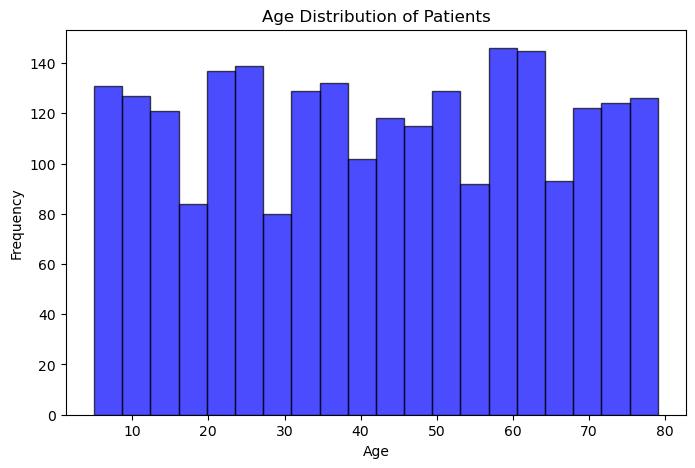

In [30]:

# 📊 1. Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=20, color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")
plt.show()


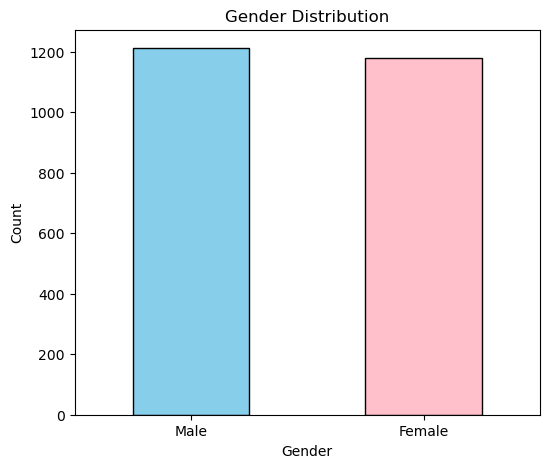

In [31]:
# 📊 2. Gender Distribution (Bar Chart)
plt.figure(figsize=(6, 5))
df["Gender"].value_counts().plot(kind="bar", color=["skyblue", "pink"], edgecolor="black")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"], rotation=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


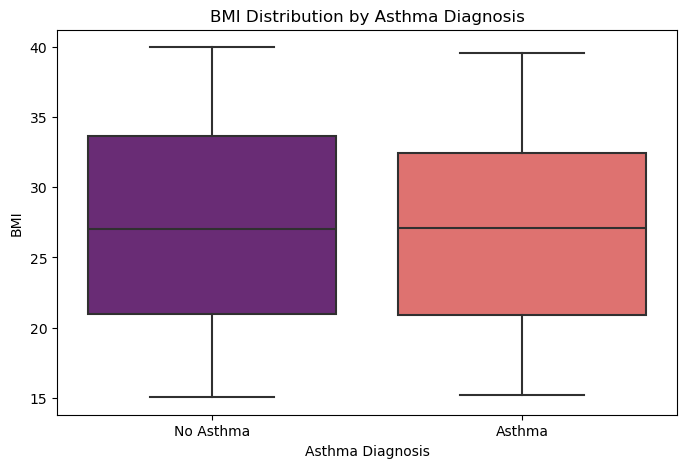

In [32]:
# 📊 4. BMI Distribution (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Diagnosis", y="BMI", data=df, palette="magma")
plt.xticks(ticks=[0, 1], labels=["No Asthma", "Asthma"])
plt.xlabel("Asthma Diagnosis")
plt.ylabel("BMI")
plt.title("BMI Distribution by Asthma Diagnosis")
plt.show()



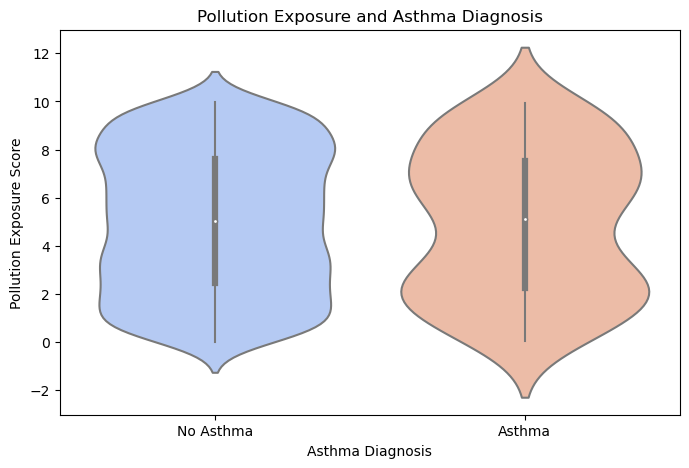

In [33]:
# 📊 5. Pollution Exposure vs. Asthma (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(x="Diagnosis", y="PollutionExposure", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["No Asthma", "Asthma"])
plt.xlabel("Asthma Diagnosis")
plt.ylabel("Pollution Exposure Score")
plt.title("Pollution Exposure and Asthma Diagnosis")
plt.show()



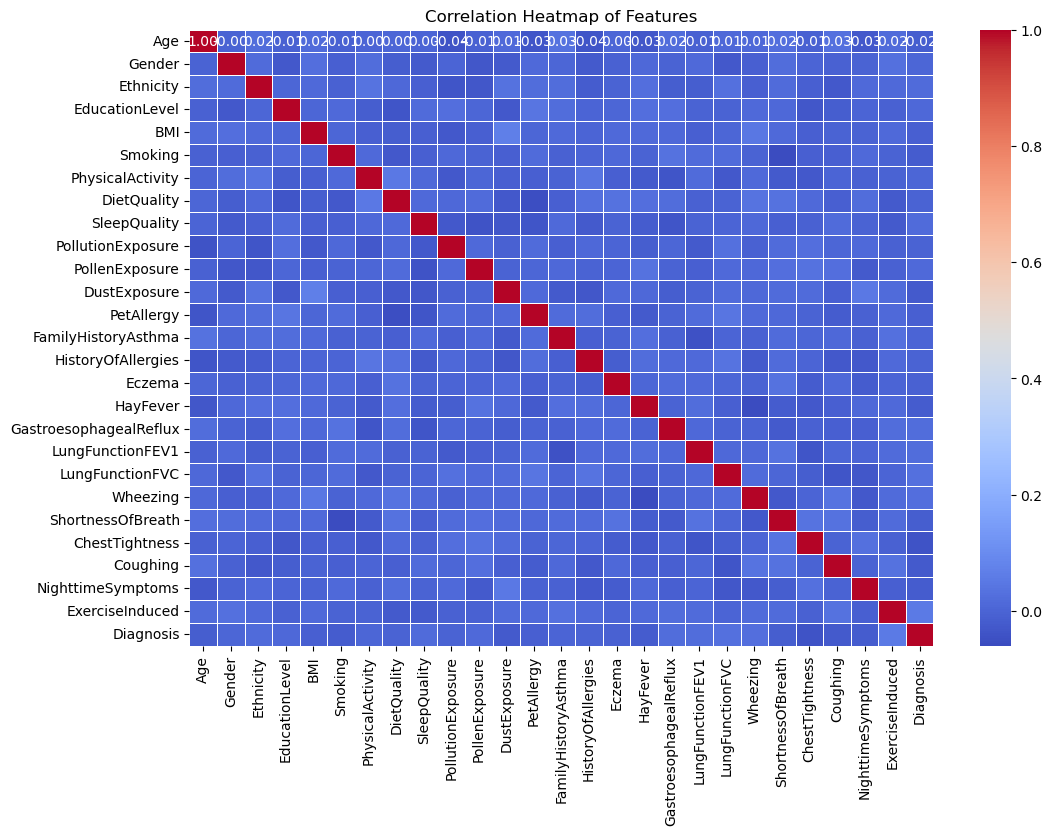

In [34]:
# 📊 6. Correlation Heatmap (Feature Relationships)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()



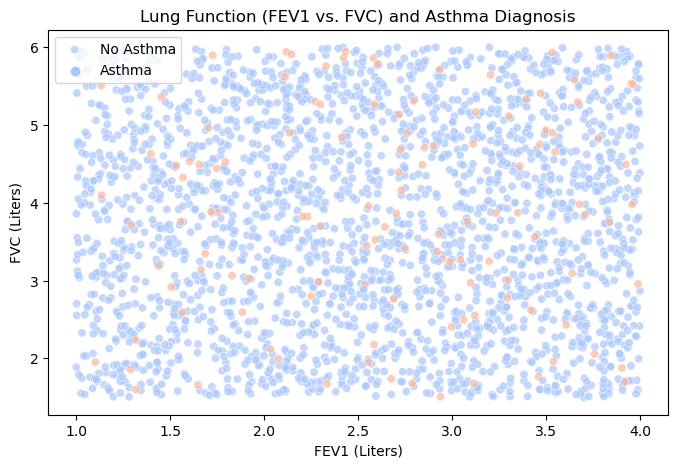

In [35]:
# 📊 7. Lung Function (FEV1 & FVC) by Asthma Status (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["LungFunctionFEV1"], y=df["LungFunctionFVC"], hue=df["Diagnosis"], palette="coolwarm", alpha=0.7)
plt.xlabel("FEV1 (Liters)")
plt.ylabel("FVC (Liters)")
plt.title("Lung Function (FEV1 vs. FVC) and Asthma Diagnosis")
plt.legend(["No Asthma", "Asthma"])
plt.show()

In [36]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                             Age    Gender  Ethnicity  EducationLevel  \
Age                     1.000000 -0.003205   0.020022       -0.006711   
Gender                 -0.003205  1.000000   0.019266       -0.026615   
Ethnicity               0.020022  0.019266   1.000000        0.004130   
EducationLevel         -0.006711 -0.026615   0.004130        1.000000   
BMI                     0.016184  0.023856   0.013947        0.004501   
Smoking                -0.009309 -0.012545  -0.007343        0.013126   
PhysicalActivity        0.000053  0.021761   0.036608       -0.015380   
DietQuality             0.004262 -0.015375   0.009032       -0.037059   
SleepQuality            0.002718 -0.023442  -0.010136        0.017655   
PollutionExposure      -0.042311  0.000744  -0.037757        0.026831   
PollenExposure         -0.006753 -0.032887  -0.034375        0.003186   
DustExposure            0.013848 -0.024320   0.033354       -0.028290   
PetAllergy             -0.034995  0.013835   0.0217

In [37]:
df.columns.dtype

dtype('O')

In [38]:
# Assuming you already have a DataFrame called 'df'
float_columns = df.select_dtypes(include=['float64'])



In [39]:
float_columns

,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
0,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,4.941206
1,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,1.702393
2,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,5.022553
3,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,2.300159
4,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,3.067944
...,...,...,...,...,...,...,...,...,...
2387,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,3.125249,5.166032
2388,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,1.132977,5.509502
2389,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,1.685962,3.346877
2390,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,3.481549,1.713274


In [40]:
float_columns.columns

Index(['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC'],
      dtype='object')

In [41]:
df[['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure',
       'LungFunctionFEV1', 'LungFunctionFVC']]

,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,LungFunctionFEV1,LungFunctionFVC
0,15.848744,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1.369051,4.941206
1,22.757042,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,2.197767,1.702393
2,18.395396,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,1.698011,5.022553
3,38.515278,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,3.032037,2.300159
4,19.283802,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,3.470589,3.067944
...,...,...,...,...,...,...,...,...,...
2387,29.059613,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,3.125249,5.166032
2388,20.740850,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,1.132977,5.509502
2389,37.079560,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,1.685962,3.346877
2390,23.444712,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,3.481549,1.713274


In [42]:
df[['BMI', 'PhysicalActivity', 'DietQuality']]

,BMI,PhysicalActivity,DietQuality
0,15.848744,0.894448,5.488696
1,22.757042,5.897329,6.341014
2,18.395396,6.739367,9.196237
3,38.515278,1.404503,5.826532
4,19.283802,4.604493,3.127048
...,...,...,...
2387,29.059613,3.019854,6.119637
2388,20.740850,5.805180,4.386992
2389,37.079560,4.735169,8.214064
2390,23.444712,9.672637,7.362861


In [43]:
df['BMI'] = df['BMI'].round(2)

In [44]:
df['BMI']

0       15.85
1       22.76
2       18.40
3       38.52
4       19.28
        ...  
2387    29.06
2388    20.74
2389    37.08
2390    23.44
2391    28.12
Name: BMI, Length: 2392, dtype: float64

In [45]:
float_columns_to_round = ['PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure']

for col in float_columns_to_round:
    df[col] = df[col].round(0).astype(int)

In [46]:
df[float_columns_to_round]

,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure
0,1,5,9,7,3,1
1,6,6,5,2,7,7
2,7,9,7,1,1,5
3,1,6,4,1,8,4
4,5,3,10,1,3,8
...,...,...,...,...,...,...
2387,3,6,8,2,7,3
2388,6,4,8,8,2,6
2389,5,8,7,3,3,9
2390,10,7,7,9,8,5


In [47]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.85,0,1,5,9,7,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.76,0,6,6,5,2,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.40,0,7,9,7,1,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.52,0,1,6,4,1,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.28,0,5,3,10,1,...,0,3.470589,3.067944,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.06,0,3,6,8,2,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,18,1,0,1,20.74,0,6,4,8,8,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,54,0,3,2,37.08,0,5,8,7,3,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,46,1,0,2,23.44,0,10,7,7,9,...,1,3.481549,1.713274,0,1,1,0,1,1,0


In [48]:
# Assuming your DataFrame is named 'df'
df['LungFunctionFEV1'] = df['LungFunctionFEV1'].round(1)
df['LungFunctionFVC'] = df['LungFunctionFVC'].round(1)

In [49]:
df[['LungFunctionFEV1','LungFunctionFVC']]

,LungFunctionFEV1,LungFunctionFVC
0,1.4,4.9
1,2.2,1.7
2,1.7,5.0
3,3.0,2.3
4,3.5,3.1
...,...,...
2387,3.1,5.2
2388,1.1,5.5
2389,1.7,3.3
2390,3.5,1.7


In [50]:
df.shape

(2392, 27)

In [51]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.85,0,1,5,9,7,...,0,1.4,4.9,0,0,1,0,0,1,0
1,26,1,2,2,22.76,0,6,6,5,2,...,0,2.2,1.7,1,0,0,1,1,1,0
2,57,0,2,1,18.40,0,7,9,7,1,...,0,1.7,5.0,1,1,1,0,1,1,0
3,40,1,2,1,38.52,0,1,6,4,1,...,0,3.0,2.3,1,0,1,1,1,0,0
4,61,0,0,3,19.28,0,5,3,10,1,...,0,3.5,3.1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.06,0,3,6,8,2,...,0,3.1,5.2,0,1,0,0,0,1,1
2388,18,1,0,1,20.74,0,6,4,8,8,...,0,1.1,5.5,0,0,0,1,1,0,1
2389,54,0,3,2,37.08,0,5,8,7,3,...,0,1.7,3.3,1,0,1,1,0,1,1
2390,46,1,0,2,23.44,0,10,7,7,9,...,1,3.5,1.7,0,1,1,0,1,1,0


In [52]:
df.dtypes

Age                         int64
Gender                      int64
Ethnicity                   int64
EducationLevel              int64
BMI                       float64
Smoking                     int64
PhysicalActivity            int32
DietQuality                 int32
SleepQuality                int32
PollutionExposure           int32
PollenExposure              int32
DustExposure                int32
PetAllergy                  int64
FamilyHistoryAsthma         int64
HistoryOfAllergies          int64
Eczema                      int64
HayFever                    int64
GastroesophagealReflux      int64
LungFunctionFEV1          float64
LungFunctionFVC           float64
Wheezing                    int64
ShortnessOfBreath           int64
ChestTightness              int64
Coughing                    int64
NighttimeSymptoms           int64
ExerciseInduced             int64
Diagnosis                   int64
dtype: object

In [53]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [55]:
def model_performance_evaluation(models, X_train, y_train, X_test, y_test):
    """
    Evaluates models and prints their performance metrics in a tabular format.

    Parameters:
    - models (dict): A dictionary of model names and the corresponding model object.
    - X_train (DataFrame): The training features.
    - y_train (Series): The target variable for training.
    - X_test (DataFrame): The testing features.
    - y_test (Series): The target variable for testing.

    Returns:
    - None: Prints a table of performance metrics.
    """
    
    # Store results
    results = []

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # ROC AUC score (if binary classification)
        try:
            roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        except AttributeError:
            roc_auc = 'N/A'  # Some models don't have predict_proba
        
        # Append results for the model
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': conf_matrix.tolist(),
            'ROC AUC': roc_auc
        })
    
    # Convert results to DataFrame for easy visualization
    results_df = pd.DataFrame(results)
    
    # Display the results in tabular format
    print("Model Performance Metrics:\n")
    print(results_df.to_string(index=False))
    
    return results_df

In [56]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.85,0,1,5,9,7,...,0,1.4,4.9,0,0,1,0,0,1,0
1,26,1,2,2,22.76,0,6,6,5,2,...,0,2.2,1.7,1,0,0,1,1,1,0
2,57,0,2,1,18.40,0,7,9,7,1,...,0,1.7,5.0,1,1,1,0,1,1,0
3,40,1,2,1,38.52,0,1,6,4,1,...,0,3.0,2.3,1,0,1,1,1,0,0
4,61,0,0,3,19.28,0,5,3,10,1,...,0,3.5,3.1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.06,0,3,6,8,2,...,0,3.1,5.2,0,1,0,0,0,1,1
2388,18,1,0,1,20.74,0,6,4,8,8,...,0,1.1,5.5,0,0,0,1,1,0,1
2389,54,0,3,2,37.08,0,5,8,7,3,...,0,1.7,3.3,1,0,1,1,0,1,1
2390,46,1,0,2,23.44,0,10,7,7,9,...,1,3.5,1.7,0,1,1,0,1,1,0


In [57]:
# Data splitting
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable (Diagnosis)

In [58]:
X

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,63,0,1,0,15.85,0,1,5,9,7,...,0,0,1.4,4.9,0,0,1,0,0,1
1,26,1,2,2,22.76,0,6,6,5,2,...,0,0,2.2,1.7,1,0,0,1,1,1
2,57,0,2,1,18.40,0,7,9,7,1,...,1,0,1.7,5.0,1,1,1,0,1,1
3,40,1,2,1,38.52,0,1,6,4,1,...,1,0,3.0,2.3,1,0,1,1,1,0
4,61,0,0,3,19.28,0,5,3,10,1,...,1,0,3.5,3.1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.06,0,3,6,8,2,...,0,0,3.1,5.2,0,1,0,0,0,1
2388,18,1,0,1,20.74,0,6,4,8,8,...,0,0,1.1,5.5,0,0,0,1,1,0
2389,54,0,3,2,37.08,0,5,8,7,3,...,1,0,1.7,3.3,1,0,1,1,0,1
2390,46,1,0,2,23.44,0,10,7,7,9,...,0,1,3.5,1.7,0,1,1,0,1,1


In [59]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2387    1
2388    1
2389    1
2390    0
2391    0
Name: Diagnosis, Length: 2392, dtype: int64

In [60]:
df['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE


In [62]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Diagnosis'] = y_resampled

In [63]:
df_resampled.shape

(4536, 27)

In [64]:
df_resampled['Diagnosis'].value_counts()

Diagnosis
0    2268
1    2268
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from sklearn.model_selection import train_test_split
X = df_resampled.drop(columns=["Diagnosis"])  
y = df_resampled["Diagnosis"]


from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the entire feature set before splitting
X_scaled = scaler.fit_transform(X)

# Split the scaled data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (3628, 26), Test set size: (908, 26)


In [77]:
import joblib

In [78]:
# Save the model pipeline to a file
scaler_filename = 'scaler-asthma-ESolved.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Model saved to {scaler_filename}")

Model saved to scaler-asthma-ESolved.pkl


In [70]:
y_train.shape

(3628,)

In [68]:
# Model imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report,roc_auc_score, roc_curve

In [71]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Call the evaluation function
model_performance_evaluation(models, X_train, y_train, X_test, y_test)

Model Performance Metrics:

                 Model  Accuracy  Precision   Recall  F1 Score       Confusion Matrix  ROC AUC
         Random Forest  0.965859   0.968958 0.962555  0.965746 [[440, 14], [17, 437]] 0.990724
   Logistic Regression  0.873348   0.872527 0.874449  0.873487 [[396, 58], [57, 397]] 0.935114
Support Vector Machine  0.943833   0.927813 0.962555  0.944865 [[420, 34], [17, 437]] 0.985086
   K-Nearest Neighbors  0.854626   0.778547 0.991189  0.872093 [[326, 128], [4, 450]] 0.943782
     Gradient Boosting  0.922907   0.906780 0.942731  0.924406 [[410, 44], [26, 428]] 0.974184
              AdaBoost  0.886564   0.860370 0.922907  0.890542 [[386, 68], [35, 419]] 0.948068
        Neural Network  0.940529   0.921941 0.962555  0.941810 [[417, 37], [17, 437]] 0.977362


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC
0,Random Forest,0.965859,0.968958,0.962555,0.965746,"[[440, 14], [17, 437]]",0.990724
1,Logistic Regression,0.873348,0.872527,0.874449,0.873487,"[[396, 58], [57, 397]]",0.935114
2,Support Vector Machine,0.943833,0.927813,0.962555,0.944865,"[[420, 34], [17, 437]]",0.985086
3,K-Nearest Neighbors,0.854626,0.778547,0.991189,0.872093,"[[326, 128], [4, 450]]",0.943782
4,Gradient Boosting,0.922907,0.906780,0.942731,0.924406,"[[410, 44], [26, 428]]",0.974184
5,AdaBoost,0.886564,0.860370,0.922907,0.890542,"[[386, 68], [35, 419]]",0.948068
6,Neural Network,0.940529,0.921941,0.962555,0.941810,"[[417, 37], [17, 437]]",0.977362


### SVC (Support Vector Machine) performs excellent metrics ,besides it can identify between the two classes efficiently

In [74]:
# Initialize and train Random Forest model with default parameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # For ROC AUC calculation

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print performance metrics
print("\nRandom Forest Model Performance (Default Parameters):")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"ROC AUC Score: {roc_auc:.6f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Random Forest Model Performance (Default Parameters):
Accuracy: 0.963656
Precision: 0.960613
Recall: 0.966960
F1 Score: 0.963776
ROC AUC Score: 0.991835
Confusion Matrix:
[[436  18]
 [ 15 439]]


In [75]:
rf

RandomForestClassifier()

In [ ]:
# import joblib

# # Save the model pipeline to a file
# model_filename = 'RandomForest_Asthma-model_ESolved.pkl'
# joblib.dump(rf, model_filename)

# print(f"Model saved to {model_filename}")

Model saved to RandomForest_Asthma-model_ESolved.pkl


In [ ]:
new_data = np.array([[35, 1, 25.5, 0, 6, 7, 8, 5, 4, 3, 3.2, 4.5]])  # Example raw values

# Step 2: Create a DataFrame with the same column names as used in training
columns = ['Age', 'Gender', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 
           'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 
           'LungFunctionFEV1', 'LungFunctionFVC']
new_data_df = pd.DataFrame(new_data, columns=columns)

# Step 3: Scale only the specified numerical columns (BMI, LungFunctionFEV1, LungFunctionFVC)
numerical_cols = ['BMI', 'LungFunctionFEV1', 'LungFunctionFVC']
new_data_df[numerical_cols] = scaler.transform(new_data_df[numerical_cols])

# Step 4: Predict asthma diagnosis
asthma_predict = rf.predict(new_data_df)

# Step 5: Output the prediction
print(f"Predicted Asthma Diagnosis: {'Asthma' if asthma_predict[0] == 1 else 'No Asthma'}")

###